In [1]:
import numpy as np

# База

In [2]:
# Cоздания массивов из списков
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([[1, 2, 3], [4, 5, 6]])
arr2.shape, arr2.dtype

((2, 3), dtype('int64'))

In [3]:
# Создание массивов с использованием функций 
zeros_arr = np.zeros((3, 3))    
ones_arr = np.ones(5)              
range_arr = np.arange(10) 
zeros_arr, ones_arr, range_arr

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([1., 1., 1., 1., 1.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [4]:
arr1[2], arr2[:, 1:3] # индексирование как у списоков, а срезы можно делать многомерные

(np.int64(3),
 array([[2, 3],
        [5, 6]]))

In [5]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

sum_arr = a + b # поэлементно
prod_arr = a * b   

sum_arr, prod_arr

(array([5, 7, 9]), array([ 4, 10, 18]))

In [6]:
arr2.T # транспонирвоание

array([[1, 4],
       [2, 5],
       [3, 6]])

In [7]:
random_array = np.random.rand(20) # нумпаевский рандом

print("Случайный массив:")
print(random_array)

# сновные статистики
print("\nСтатистики массива:")
print(f"Среднее значение: {random_array.mean():.4f}")
print(f"Медиана: {np.median(random_array):.4f}")
print(f"Минимум: {random_array.min():.4f}")
print(f"Максимум: {random_array.max():.4f}")
print(f"Стандартное отклонение: {random_array.std():.4f}")
print(f"Дисперсия: {random_array.var():.4f}")


Случайный массив:
[0.57469387 0.24016926 0.55984402 0.01839139 0.34020784 0.30003452
 0.37405407 0.46552924 0.5794017  0.39910512 0.2341516  0.9225453
 0.14970423 0.20595798 0.02871405 0.98901885 0.32784735 0.00267461
 0.87989903 0.5082082 ]

Статистики массива:
Среднее значение: 0.4050
Медиана: 0.3571
Минимум: 0.0027
Максимум: 0.9890
Стандартное отклонение: 0.2800
Дисперсия: 0.0784


In [8]:
normal_data = np.random.normal(loc=0, scale=1, size=50) # нормальный рандом

print("Случайный массив:")
print(normal_data)

# сновные статистики
print("\nСтатистики массива:")
print(f"Среднее значение: {normal_data.mean():.4f}")
print(f"Медиана: {np.median(normal_data):.4f}")
print(f"Минимум: {normal_data.min():.4f}")
print(f"Максимум: {normal_data.max():.4f}")
print(f"Стандартное отклонение: {normal_data.std():.4f}")
print(f"Дисперсия: {normal_data.var():.4f}")


Случайный массив:
[ 2.01105034 -0.63445025 -0.18988156  0.23287194  1.36870275 -0.53819983
  0.61613701 -2.58340111 -0.29131279  0.07226468 -0.12352458 -0.81125422
  1.04228756  1.65985642 -1.18175761 -1.66990812  1.25845437  0.14321742
 -0.77717629  1.3840457   0.188568   -0.96952485 -0.80802049  1.28350695
 -0.59786921  0.02023899  0.32597102  1.6412606  -0.88695844  0.06079973
  0.83176056  1.16709612 -0.36989073 -0.53544066  1.41363984 -1.06959159
  0.8568026   0.69965359 -0.32541518  0.59070967 -1.0064421   1.30410434
 -0.50081014  0.99213468 -0.0214265   0.36387596  0.0182596   0.21025549
 -0.29833881 -1.43607778]

Статистики массива:
Среднее значение: 0.0826
Медиана: 0.0405
Минимум: -2.5834
Максимум: 2.0111
Стандартное отклонение: 0.9708
Дисперсия: 0.9425


# Из практики
Я решил вспомнить некоторые вещи, которые уже доводилось реализовывать

## Функция для решения СЛАУ методом Крамера
Изучал на *Линейной алгебре*

In [9]:
def Cramer_solve(
    A: np.ndarray,
    B: np.ndarray
) -> np.ndarray:
    
    A_det = np.linalg.det(A) # определитель

    if np.isclose(A_det, 0):
        raise ValueError("Метод непременим") # если окажется вырожденная система

    n = A.shape[0]
    
    x_roots = np.zeros(n) # массив под ответы

    for i in range(n):
        A_i = A.copy()
        A_i[:, i] = B # создание временной матрицы, от которой надо найти определитель
        x_roots[i] = np.linalg.det(A_i) / A_det
        
    return x_roots
    

### Хорошая СЛАУ

In [10]:
A = np.array([[2, -1, 3],
               [4, 2, 1],
               [-3, 1, 2]])

B = np.array([5, 6, -1])

Cramer_solve(A, B)

array([1.10638298, 0.27659574, 1.0212766 ])

### Определитель A = 0

In [11]:
A = np.array([[1, 2, 3],
               [2, 4, 6],
               [1, 5, 9]])

B = np.array([6, 12, 15])

Cramer_solve(A, B)

ValueError: Метод непременим

## Метод Харкера
Изучал на предмете *Теория принятия решений*

Суть в том, чтобы достичь оптималной согласованности в матрице парных сравнений, минимально изменяя исходные оценки

In [12]:
def CR(matrix: np.array) -> float:
    """
    Подсчёт метрики согласованности
    """
    RI = {
        1: 0.00, 2: 0.00, 3: 0.58, 4: 0.90, 5: 1.12,
        6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45, 10: 1.49
    }[len(matrix)] # тут выбирается в зависимости от размера матрицы, которую надо улучшать

    eigenvalues, _ = np.linalg.eig(matrix)
    lambda_max = np.max(np.real(eigenvalues[np.abs(np.imag(eigenvalues)) < 1e-6]))
    CI = (lambda_max - len(matrix)) / (len(matrix) - 1)
    return float((CI / RI).real)


def V_matrix(matrix: np.array) -> np.array:
    """
    Возврат идеальной матрицы, где согласованность наилучшая
    Определяется за счёт собственных чисел (комплексные части не в счёт)
    """
    eigenvalues, V = np.linalg.eig(matrix)
    idx = np.argmax(eigenvalues.real)

    V_max = V[:, idx].real
    V_max = V_max / np.sum(V_max)

    return V_max[:, None] / V_max[None, :]


def Harker_optimize(
    matrix: np.array,
    tol=0.1,
    max_iter=100
) -> np.array:
    """
    Численный метод, который берёт идельную матрицу и 
    меняет соотношения в исходной, опираясь на лучшую матрицу.
    Можно дополнительно задать точность и макс. число итераций, 
    но в качестве стандарта используют порог в 0.1
    """
    
    A = matrix.copy()

    for iteration in range(max_iter):
        cr = CR(A)
        print(f"Iter {iteration + 1}, CR={cr:.4f}")

        if cr <= tol:
            break

        ideal = V_matrix(A)

        diff = np.abs(A - ideal)
        np.fill_diagonal(diff, 0)

        i, j = np.unravel_index(np.argmax(diff), A.shape)

        new_val = ideal[i, j]
        print(f"({i},{j}): {A[i,j]:.3f} => {new_val:.3f}\n")

        A[i, j] = new_val
        A[j, i] = 1 / new_val

    return A

In [13]:
A = np.array([
    [1,   2,   3,   4],
    [1/2, 1,   5,   9],
    [1/3, 1/5, 1, 1/8],
    [1/4, 1/9, 8,   1]
])

A_opt = Harker_optimize(A)

print("\n\n===== Итоговая матрица =====")
print(np.round(A_opt, 3))

print("\nCR =", round(CR(A_opt), 4))


Iter 1, CR=0.4199
(1,3): 9.000 => 2.976

Iter 2, CR=0.2412
(3,2): 8.000 => 3.108

Iter 3, CR=0.0957


===== Итоговая матрица =====
[[1.    2.    3.    4.   ]
 [0.5   1.    5.    2.976]
 [0.333 0.2   1.    0.322]
 [0.25  0.336 3.108 1.   ]]

CR = 0.0957


## Демонстрация сложности алгоримтов

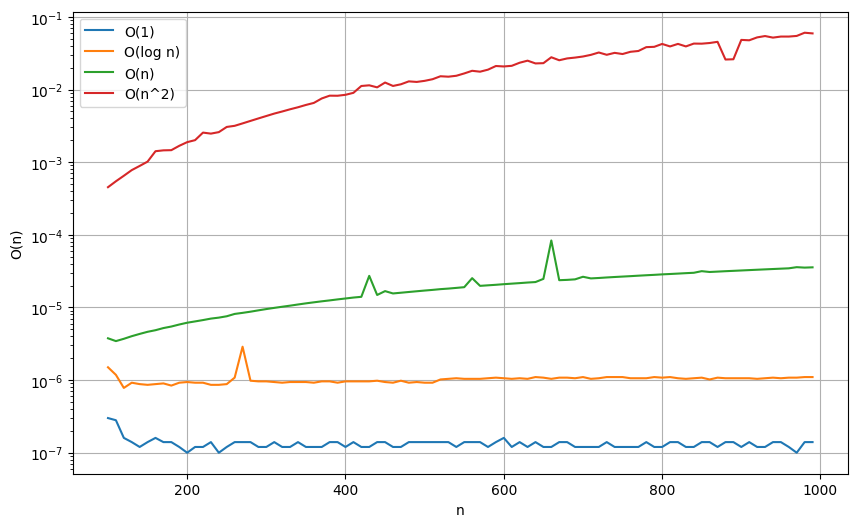

In [14]:
import time
import typing

import matplotlib.pyplot as plt


def constant_time_algo(n: int) -> int:
    return 1


def linear_time_algo(n: int) -> int:
    s = 0
    for i in range(n):
        s += i
    return s


def quadratic_time_algo(n: int) -> int:
    s = 0
    for i in range(n):
        for j in range(n):
            s += i * j
    return s


def logarithmic_time_algo(n: int) -> int:
    count = 0
    i = n
    while i > 1:
        i //= 2
        count += 1
    return count


def measure_time(
    func: typing.Callable[[int], int],
    n: int,
    repeats: int = 5
) -> float:
    """
    Функция замера среднего времени исполнения алгоритма
    """
    times = []
    for _ in range(repeats):
        start = time.perf_counter()
        func(n)
        end = time.perf_counter()
        times.append(end - start)
    return sum(times) / repeats


ns = np.arange(100, 1000, 10) # набор данных различных размеров

times_const = np.fromiter((measure_time(constant_time_algo, n) for n in ns), dtype=float)
times_linear = np.fromiter((measure_time(linear_time_algo, n) for n in ns), dtype=float)
times_quad = np.fromiter((measure_time(quadratic_time_algo, n) for n in ns), dtype=float)
times_log = np.fromiter((measure_time(logarithmic_time_algo, n) for n in ns), dtype=float)


plt.figure(figsize=(10, 6))
plt.plot(ns, times_const, label='O(1)')
plt.plot(ns, times_log, label='O(log n)')
plt.plot(ns, times_linear, label='O(n)')
plt.plot(ns, times_quad, label='O(n^2)')

plt.xlabel('n')
plt.ylabel('O(n)')
plt.legend()
plt.grid(True)
plt.yscale('log')  # логарифмическая шкала для наглядности, иначе квадратная сложность улетает вверх